In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [71]:
df_orig = pd.read_csv('list_ai.csv')

df_orig.set_index('Company', inplace=True )
df_orig.drop(columns=['Unnamed: 0'], inplace=True)

In [72]:
df_orig.head()

,Category,Sub-Category,Acquired/IPO,Exit Year,Data Driven / Hardwired Video
Company,,,,,
Amazon QuickSight,Analytics,BI Platforms,NaN,NaN,NaN
AtScale,Analytics,BI Platforms,NaN,NaN,NaN
Bime Analytics,Analytics,BI Platforms,Acquired by Zendesk in October 2015,2015.0,NaN
Birst,Analytics,BI Platforms,Acquired by Infor in April 2017,2017.0,NaN
Domo,Analytics,BI Platforms,IPO in June 2018,2018.0,NaN


In [73]:
exit_filt = df_orig['Exit Year'].isnull()
print(f"Number of companies = {df_orig.shape[0]}, did not exit {exit_filt.sum()}")

Number of companies = 1478, did not exit 1192


In [74]:
df = df_orig[exit_filt]

<BarContainer object of 9 artists>

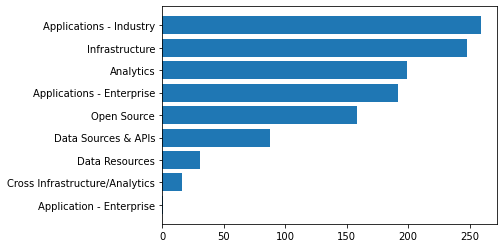

In [84]:
category = df.groupby('Category')['Category'].count().sort_values()
plt.barh(category.index, category)

In [89]:
sub_category = df.groupby('Sub-Category')['Sub-Category'].count().sort_values()
sub_category[sub_category > 5].count()

77

<BarContainer object of 18 artists>

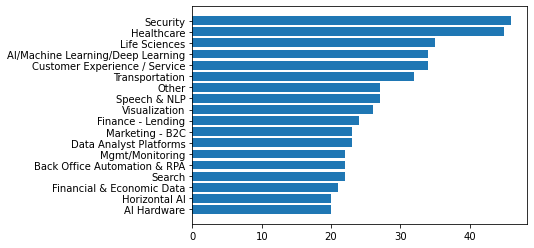

In [99]:
sub_category20 = sub_category[sub_category >= 20]
plt.barh(sub_category20.index, sub_category20 )

<BarContainer object of 30 artists>

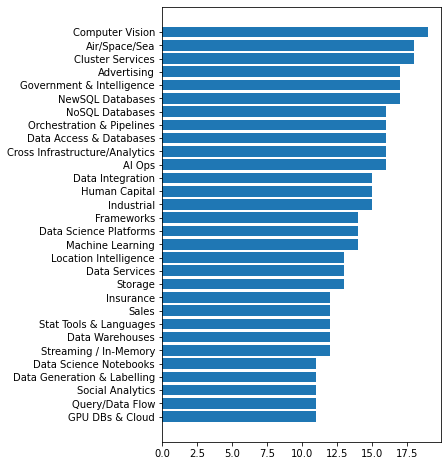

In [124]:
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (5,8)
filt = (sub_category > 10) & (sub_category < 20)
sub_category_m = sub_category[filt]
plt.barh(sub_category_m.index, sub_category_m )

In [120]:
app_ind = df[df['Category'] == 'Applications - Industry'].groupby('Sub-Category')['Category'].count() 
app_ind.sort_values(inplace=True)

<BarContainer object of 15 artists>

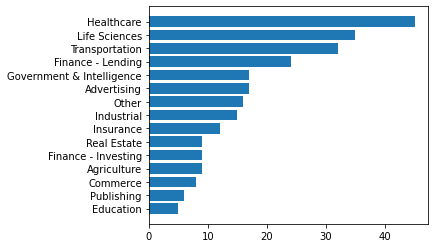

In [128]:
mpl.rcParams['figure.figsize'] = (5,4)
plt.barh(app_ind.index, app_ind)